In [1]:
#Import necessary libraries
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import cv2

The scan data array has the shape:  (256, 256, 130)
The scan header is as follows: 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 130   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        1.        1.        1.2999954 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.5
quatern_c       : 0.5
quatern_

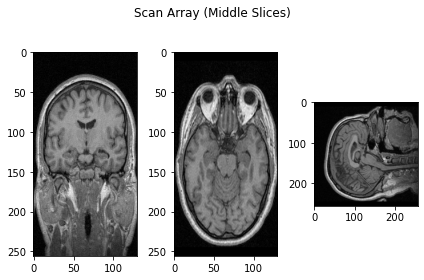

The required aspect ratios are:  [0.76923347, 0.76923347, 1.0]


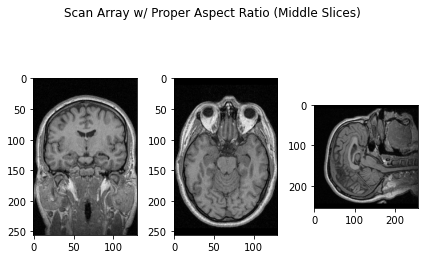

The new scan size is:  (256, 256, 169)


In [3]:
#Define the filepath to your NIfTI scan
scanFilePath = 'c:/<FILEPATH TO YOUR NIfTI SCAN>'

#Load the scan and extract data using nibabel 
scan = nib.load(scanFilePath)
scanArray = scan.get_fdata()

#Get and print the scan's shape 
scanArrayShape = scanArray.shape
print('The scan data array has the shape: ', scanArrayShape)

#Get and print the scan's header
scanHeader = scan.header
print('The scan header is as follows: \n', scanHeader)

#Display scan array's middle slices
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], cmap='gray')
fig.tight_layout()
plt.show()

#Calculate proper aspect ratios
pixDim = scanHeader['pixdim'][1:4]
aspectRatios = [pixDim[1]/pixDim[2],pixDim[0]/pixDim[2],pixDim[0]/pixDim[1]]
print('The required aspect ratios are: ', aspectRatios)

#Display scan array's middle slices with proper aspect ratio
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array w/ Proper Aspect Ratio (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], aspect = aspectRatios[0], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], aspect = aspectRatios[1], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], aspect = aspectRatios[2], cmap='gray')
fig.tight_layout()
plt.show()

#Calculate new image dimensions from aspect ratio
newScanDims = np.multiply(scanArrayShape, pixDim)
newScanDims = (round(newScanDims[0]),round(newScanDims[1]),round(newScanDims[2]))
print('The new scan size is: ', newScanDims)

#Set the output file path
outputPath = 'c:/<FILEPATH TO YOUR OUTPUT DIRECTORY>'

#Iterate and save scan slices along 0th dimension
for i in range(scanArrayShape[0]):
    #Resample the slice
    outputArray = cv2.resize(scanArray[i,:,:], (newScanDims[2],newScanDims[1]))
    #Save the slice as .png image
    cv2.imwrite(outputPath+'/Dim0_Slice'+str(i)+'.png', outputArray)

#Iterate and save scan slices along 1st dimension
for i in range(scanArrayShape[1]):
    #Resample the slice
    outputArray = cv2.resize(scanArray[:,i,:], (newScanDims[2],newScanDims[0]))
    #Save the slice as .png image
    cv2.imwrite(outputPath+'/Dim1_Slice'+str(i)+'.png', outputArray)

#Iterate and save scan slices along 2nd dimension
for i in range(scanArrayShape[2]):
    #Resample the slice
    outputArray = cv2.resize(scanArray[:,:,i], (newScanDims[1],newScanDims[0]))
    #Rotate slice clockwise 90 degrees
    outputArray = cv2.rotate(outputArray, cv2.ROTATE_90_CLOCKWISE)
    #Save the slice as .png image
    cv2.imwrite(outputPath+'/Dim2_Slice'+str(i)+'.png', outputArray)
    